In [1]:
from pymongo import MongoClient

In [2]:
mongo_client = MongoClient('34.209.155.42', 27016)
database_reference = mongo_client.twitter
tweet_collection = database_reference.tweets

In [3]:
cursor_sample = tweet_collection.aggregate([{'$sample': {'size': 5000}}])

ServerSelectionTimeoutError: 34.209.155.42:27016: timed out

In [44]:
tweets = list(cursor_sample)

In [45]:
all_keys = set()
for tweet in tweets:
    user = tweet['user']
    keys = list(user.keys())
    all_keys = all_keys.union(keys)

In [46]:
all_keys

set()

In [26]:
keep = ['created_at','description','favourites_count','followers_count','friends_count', 'geo_enabled','id_str',
        'lang','location','name','screen_name','statuses_count','time_zone','verified']

In [27]:
import pandas as pd

In [28]:
cursor_sample = tweet_collection.aggregate([{'$sample': {'size': 5}}])
tweets = pd.DataFrame(list(cursor_sample))

In [29]:
users = pd.DataFrame(list(tweets['user'].values))

In [30]:
users = users[keep].copy() # ask me why I did this
users['created_at'] = pd.to_datetime(users['created_at'])
users

,created_at,description,favourites_count,followers_count,friends_count,geo_enabled,id_str,lang,location,name,screen_name,statuses_count,time_zone,verified
0,2011-04-21 01:22:27,Showrunner Danger & Eggs on @amazonvideo. EP T...,25382,10273,805,True,285368746,en,"Los Angeles, CA",Shadi Petosky,shadipetosky,626,Pacific Time (US & Canada),True
1,2013-10-02 02:41:25,Hilary Jones is a photographer. Employs himsel...,241516,7130,6981,True,1925368770,en,"Los Angeles, California",Hilary Jones,fatilatuti,287580,None,False
2,2015-05-20 22:47:05,Ex-Natural history curator @BristolMuseum and ...,9155,1078,1060,True,3292101568,en,"Bristol, England",Bonnie Griffin,BonnieBeasties,3624,None,False
3,2012-09-21 20:33:29,"Finally, the flesh reflects the madness within",5465,194,163,True,838523690,en,Los Angeles,ZaddieGary △⃒⃘,therealgary55,13716,None,False
4,2011-08-30 05:37:16,work @Twitter // play @joinniche,3669,689,837,True,364701489,en,In bed looking at memes,will,willgranberry,3625,Arizona,False


In [31]:
user_collection = database_reference.users 

In [32]:
def get_n_tweets(n):
    
    n_samples = 0
    tweets = []
    
    filter_on_unprocessed = { '$match' : {
         'user_processed': { "$exists": False } } 
    }
    
    while n_samples < n:
        
        sample = { '$sample': { 'size': n - n_samples } }

        cursor_sample = tweet_collection.aggregate([
            sample,
            filter_on_unprocessed
        ])
    
        tweets += list(cursor_sample)
        n_samples = len(tweets)
        
    ids = [tweet['_id'] for tweet in tweets]
        
    return ids, pd.DataFrame(tweets)

def parse_users_from_tweets(tweets):
    users = pd.DataFrame(list(tweets['user'].values))
    users = users[keep].copy()
    users['created_at'] = pd.to_datetime(users['created_at'])
    return users.to_dict('records')
    
def process_users(n=5):
    
    ids, tweets = get_n_tweets(n)
    users = parse_users_from_tweets(tweets)
    
    user_collection.insert_many(users)
    
    tweet_filter_by_id = {'_id' : { '$in' : ids}}
    update = {'$set' : {'user_processed' : True}}
    tweet_collection.update_many(tweet_filter_by_id, update)
    
    return ids


In [33]:
import time

In [34]:
def time_user_processing(n, times):
    start = time.time()
    process_users(n)
    end = time.time() - start
    times.append((n, end))
    return times

In [35]:
times = []
for n in [5,10,20,50,100,200,500,1000]:
    times = time_user_processing(n, times)

In [36]:
times

[(5, 1.2681708335876465),
 (10, 1.9727823734283447),
 (20, 1.8006556034088135),
 (50, 2.786254644393921),
 (100, 3.1158394813537598),
 (200, 4.590336799621582),
 (500, 8.720104217529297),
 (1000, 16.33834409713745)]

In [37]:
import matplotlib.pyplot as plt
import numpy as np

(0, 5)

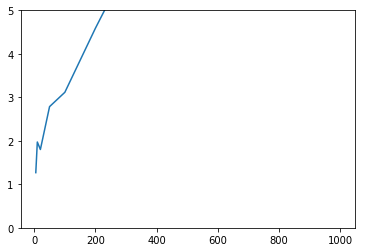

In [38]:
test_results = np.array(times)
plt.plot(test_results[:, 0], test_results[:, 1])
plt.ylim(0,5)

In [39]:
times = []
for n in [100,200,500,1000, 2000, 4000, 5000, 10000]:
    times = time_user_processing(n, times)
    

test_results = np.array(times)
plt.plot(test_results[:, 0], test_results[:, 1])
plt.ylim(0,50)

AttributeError: 'float' object has no attribute 'keys'

In [ ]:
start = time.time()
process_users(100000)
time.time() - start

In [194]:
unprocessed_tweets = tweet_collection.find({'user_processed': { "$exists": False } } )

In [210]:
start = time.time()
process_users(100000)
print(time.time() - start)

280.23269605636597


In [211]:
start = time.time()
process_users(100000)
print(time.time() - start)

325.3904719352722


In [212]:
start = time.time()
process_users(100000)
print(time.time() - start)

337.5805776119232


In [213]:
start = time.time()
process_users(100000)
print(time.time() - start)

AttributeError: 'float' object has no attribute 'keys'

In [ ]:
start = time.time()
process_users(100000)
print(time.time() - start)

In [ ]:
start = time.time()
process_users(100000)
print(time.time() - start)

In [ ]:
start = time.time()
process_users(100000)
print(time.time() - start)

In [ ]:
start = time.time()
process_users(100000)
print(time.time() - start)

In [ ]:
start = time.time()
process_users(100000)
print(time.time() - start)

In [ ]:
start = time.time()
process_users(100000)
print(time.time() - start)

In [ ]:
start = time.time()
process_users(100000)
print(time.time() - start)

In [ ]:
unprocessed_tweets.count()